In [63]:
import serial
import time
import sys
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

import struct

# Change your usb name here
ser = serial.Serial('/dev/tty.SLAB_USBtoUART', 115200, timeout=0.1)

In [54]:
# Command sending function
def send_cmd(btarr):
    if len(btarr) > 10:
        ser.write(btarr[0:10])
    else:
        btarr.extend(bytearray(10 - len(btarr)))
        ser.write(btarr)

In [45]:
# Set pwm
send_cmd(bytearray([0x01, 0x50]))

string = ser.read(10)
print(string)

b'OK'


In [58]:
# Read button pin
send_cmd(bytearray([0x02]))

string = ser.read(10)
print(string)

b'LOW'


In [52]:
# Read ADC value
send_cmd(bytearray([0x03]))

buf = ser.read()
if len(buf) > 0 :
    adc = ord(buf)

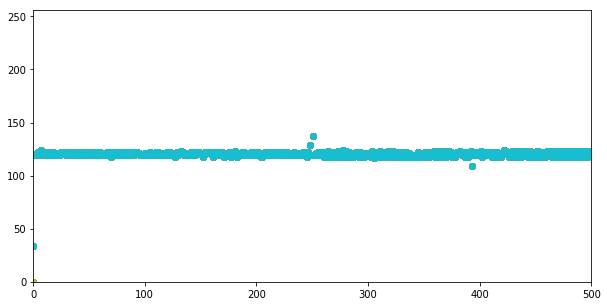

In [64]:
# Plot ADC in realtime
points = 500
y = np.zeros(points)
x = np.zeros(points)
plt.figure(figsize=(10, 5))
axes = plt.gca()
axes.set_xlim([0, points])
axes.set_ylim([0, 256])

for i in range(points):
    send_cmd(bytearray([0x03]))
    buf = ser.read()
    if len(buf) > 0 :
        adc = ord(buf)
        x[i] = i
        y[i] = adc
        plt.scatter(x, y)
        time.sleep(0.02)